<a href="https://colab.research.google.com/github/abaskon/LiteratureReviewRobotics/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/abaskon/LiteratureReviewRobotics.git

Cloning into 'LiteratureReviewRobotics'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import IPython
import IPython.display
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

In [ ]:
df_1 = pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/CSV_Files/2010.csv')
df_2 = pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/CSV_Files/2011.csv')
df_3 = pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/CSV_Files/2012.csv')
df_4 = pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/CSV_Files/2013.csv')
df_5 = pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/CSV_Files/2014.csv')
df_6 = pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/CSV_Files/2015.csv')
df_7 = pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/CSV_Files/2016.csv')
df_8 = pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/CSV_Files/2017.csv')
df_9 = pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/CSV_Files/2018.csv')
df_10 =pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/CSV_Files/2019.csv')
df_11 =pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/CSV_Files/2020.csv')


data = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11], axis = 0)

data = data.drop_duplicates(keep = False)
print(' Entries:', len(data), '\n', data.columns)

data.drop(['Abstract', 'Molecular Sequence Numbers',
       'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'Funding Details',
       'Funding Text 1', 'Funding Text 2', 'Funding Text 3', 'Funding Text 4', 'Correspondence Address', 'Editors', 'Sponsors', 'ISSN', 'ISBN', 'CODEN',],axis=1,inplace=True)

In [16]:
print(' Entries:', len(data), '\n', data.columns)

 Entries: 21707 
 Index(['Unnamed: 0', 'Authors', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Affiliations',
       'Authors with affiliations', 'Author Keywords', 'Index Keywords',
       'Funding Text 5', 'Funding Text 6', 'References', 'Publisher',
       'Conference name', 'Conference date', 'Conference location',
       'Conference code', 'PubMed ID', 'Language of Original Document',
       'Abbreviated Source Title', 'Document Type', 'Publication Stage',
       'Open Access', 'Source', 'EID', 'Unnamed: 46', 'Unnamed: 45',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53'],
      dtype='object')


In [17]:
data.to_csv("MetaData.csv")

In [18]:
data.head(10)

,Unnamed: 0,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,Page count,Cited by,DOI,Link,Affiliations,Authors with affiliations,Author Keywords,Index Keywords,Funding Text 5,Funding Text 6,References,Publisher,Conference name,Conference date,Conference location,Conference code,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID,Unnamed: 46,Unnamed: 45,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53
0,0.0,"LeCun Y., Kavukcuoglu K., Farabet C.",55666793600;25646533000;35177127500;,Convolutional networks and applications in vision,2010,ISCAS 2010 - 2010 IEEE International Symposium...,NaN,NaN,5537907,253,256,NaN,1144,10.1109/ISCAS.2010.5537907,https://www.scopus.com/inward/record.uri?eid=2...,"Computer Science Department, Courant Institute...","LeCun, Y., Computer Science Department, Couran...",NaN,Auditory perception; Commercial applications; ...,NaN,NaN,"LeCun, Y., Boser, B., Denker, J.S., Henderson,...",NaN,2010 IEEE International Symposium on Circuits ...,30 May 2010 through 2 June 2010,Paris,81485,NaN,English,ISCAS - IEEE Int. Symp. Circuits Syst.: Nano-B...,Conference Paper,Final,"All Open Access, Green",Scopus,2-s2.0-77955998889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,"Nelson B.J., Kaliakatsos I.K., Abbott J.J.",57202020272;6507409396;7201623373;,Microrobots for minimally invasive medicine,2010,Annual Review of Biomedical Engineering,12,NaN,NaN,55,85,NaN,1066,10.1146/annurev-bioeng-010510-103409,https://www.scopus.com/inward/record.uri?eid=2...,"Institute of Robotics and Intelligent Systems,...","Nelson, B.J., Institute of Robotics and Intell...",medical; microrobot; minimally invasive; surgi...,medical; Micro robots; Minimally invasive; sur...,NaN,NaN,"Tendick, F., Sastry, S.S., Fearing, R.S., Cohn...",NaN,NaN,NaN,NaN,NaN,2.04156e+07,English,Annu. Rev. Biomed. Eng.,Review,Final,NaN,Scopus,2-s2.0-77955605195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,"Webster III R.J., Jones B.A.",7402927752;7404958235;,Design and kinematic modeling of constant curv...,2010,International Journal of Robotics Research,29,13,NaN,1661,1683,NaN,965,10.1177/0278364910368147,https://www.scopus.com/inward/record.uri?eid=2...,"Department of Mechanical Engineering, Vanderbi...","Webster III, R.J., Department of Mechanical En...",biologically inspired robot; continuum robot; ...,Biologically-inspired robots; Compliant assemb...,NaN,NaN,"Anderson, V., Horn, R., Tensor arm manipulator...",NaN,NaN,NaN,NaN,NaN,NaN,English,Int J Rob Res,Article,Final,NaN,Scopus,2-s2.0-78650312297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Suo Z.,57203199871;,Theory of dielectric elastomers,2010,Acta Mechanica Solida Sinica,23,6,NaN,549,578,NaN,649,10.1016/S0894-9166(11)60004-9,https://www.scopus.com/inward/record.uri?eid=2...,"School of Engineering and Applied Sciences, Ka...","Suo, Z., School of Engineering and Applied Sci...",dielectric elastomer; electromechanical instab...,Active material; Alternative routes; Braille d...,NaN,NaN,"Mathger, L.M., Denton, E.J., Marshall, N.J., H...",NaN,NaN,NaN,NaN,NaN,NaN,English,Acta Mech. Solida Sin.,Article,Final,NaN,Scopus,2-s2.0-78650965078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,"Grisetti G., Kummerle R., Stachniss C., Burgar...",9839895600;57080207100;6507517732;7003610380;,A tutorial on graph-based SLAM,2010,IEEE Intelligent Transportation Systems Magazine,2,4,5681215,31,43,NaN,637,10.1109/MITS.2010.939925,https://www.scopus.com/inward/record.uri?eid=2...,"Freiburg University, Germany","Grisetti, G., Freiburg University, Germany; Ku...",NaN,Graph-based; Least-squares errors; Mobile robo...,NaN,NaN,"Besl, P.J., McKay, N.D., A method for registra...",NaN,NaN,NaN,NaN,NaN,NaN,English,IEEE Intell. Transp. Syst. Mag.,Article,Final,"All Open Access, Green",Scopus,2-s2.0-80051995834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,"Rusu R.B., Bradski G., Thibaux R., Hsu J.",15758234800;6602226632;650

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21707 entries, 0 to 1924
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1992 non-null   float64
 1   Authors                        21705 non-null  object 
 2   Author(s) ID                   21706 non-null  object 
 3   Title                          21704 non-null  object 
 4   Year                           21703 non-null  object 
 5   Source title                   21700 non-null  object 
 6   Volume                         17053 non-null  object 
 7   Issue                          12041 non-null  object 
 8   Art. No.                       11397 non-null  object 
 9   Page start                     18825 non-null  object 
 10  Page end                       18825 non-null  object 
 11  Page count                     44 non-null     object 
 12  Cited by                       21703 non-null  

In [21]:
DC =pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/Total_pub.csv')

In [22]:
import matplotlib.pyplot as plt

def plot_df(df, x, y, title, xlabel, ylabel, dpi=100):
    plt.figure(figsize=(30,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


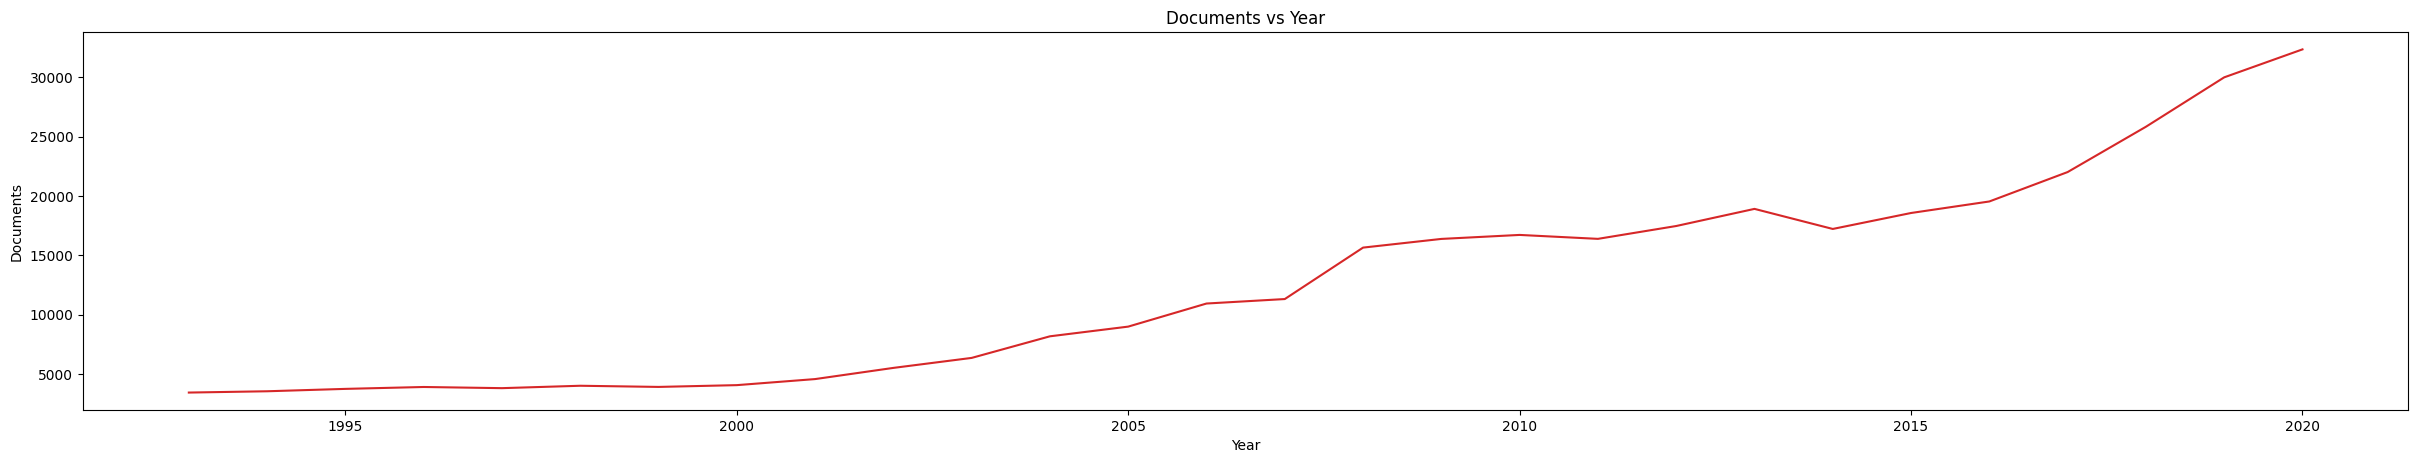

In [26]:
plot_df(DC, x= DC.Year, y=(DC.Documents), title='Documents vs Year', xlabel='Year', ylabel='Documents') 

In [ ]:
### Keras and Tensorflow >2.0

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(DC['Documents']).reshape(-1,1))


In [28]:
df1.shape

(28, 1)

In [29]:
print(df1)

[[0.        ]
 [0.00377358]
 [0.01073221]
 [0.0162368 ]
 [0.01284404]
 [0.01983729]
 [0.01644452]
 [0.02163753]
 [0.03929375]
 [0.07187121]
 [0.10098667]
 [0.16392591]
 [0.19217587]
 [0.25944262]
 [0.27249437]
 [0.42239917]
 [0.44770642]
 [0.45933876]
 [0.44787952]
 [0.48530379]
 [0.5352259 ]
 [0.47675264]
 [0.52324736]
 [0.5568288 ]
 [0.64251342]
 [0.77451965]
 [0.91850441]
 [1.        ]]


In [30]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [31]:
training_size,test_size

(18, 10)

In [32]:
train_data

array([[0.        ],
       [0.00377358],
       [0.01073221],
       [0.0162368 ],
       [0.01284404],
       [0.01983729],
       [0.01644452],
       [0.02163753],
       [0.03929375],
       [0.07187121],
       [0.10098667],
       [0.16392591],
       [0.19217587],
       [0.25944262],
       [0.27249437],
       [0.42239917],
       [0.44770642],
       [0.45933876]])

In [33]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [47]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [48]:
print(X_train.shape), print(y_train.shape)

(13, 4)
(13,)


(None, None)

In [49]:
print(X_test.shape), print(ytest.shape)

(5, 4)
(5,)


(None, None)

In [50]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [39]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [51]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 4, 50)             10400     
                                                                 
 lstm_4 (LSTM)               (None, 4, 50)             20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.0457 - val_loss: 0.4590
Epoch 2/100
1/1 [==============================] - 0s 37ms/step - loss: 0.0426 - val_loss: 0.4401
Epoch 3/100
1/1 [==============================] - 0s 38ms/step - loss: 0.0395 - val_loss: 0.4205
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0365 - val_loss: 0.4000
Epoch 5/100
1/1 [==============================] - 0s 30ms/step - loss: 0.0335 - val_loss: 0.3784
Epoch 6/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0306 - val_loss: 0.3555
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 0.0278 - val_loss: 0.3313
Epoch 8/100
1/1 [==============================] - 0s 38ms/step - loss: 0.0251 - val_loss: 0.3058
Epoch 9/100
1/1 [==============================] - 0s 47ms/step - loss: 0.0227 - val_loss: 0.2790
Epoch 10/100
1/1 [==============================] - 0s 36ms/step - loss: 0.0206 - val_loss: 0.2513
Epoch 11/100
1/1 [===

In [54]:
import tensorflow as tf

In [55]:
tf.__version__

'2.7.0'

In [56]:
#prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [57]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [58]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

8957.293998395313

In [59]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

34163.60845839944

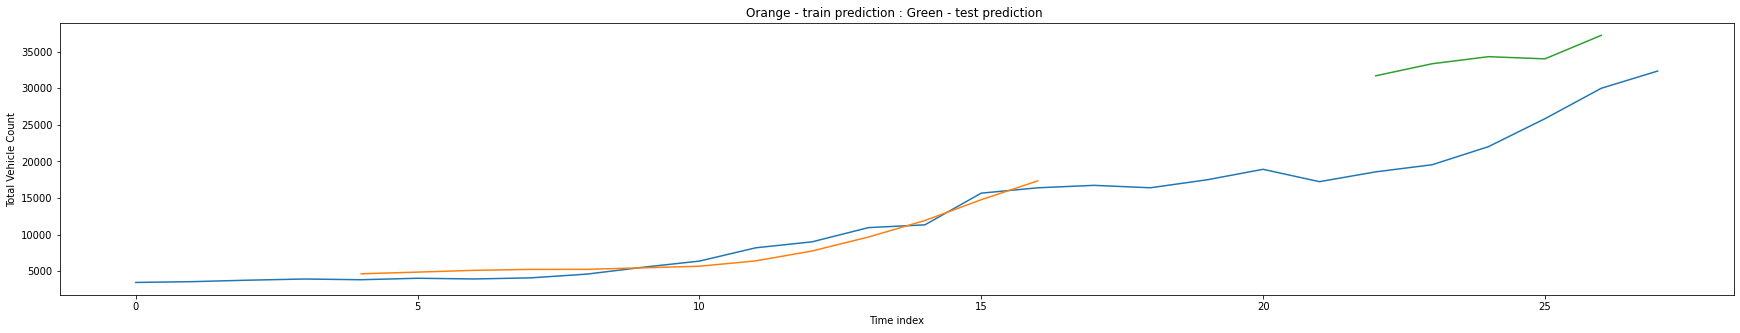

In [61]:

# shift train predictions for plotting
from pylab import rcParams
rcParams['figure.figsize'] = 30, 5
look_back=4
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.gca().set(title="Orange - train prediction : Green - test prediction ", xlabel="Time index", ylabel="Total Vehicle Count")
plt.show()

In [62]:
L=len(test_data)
L

10

In [64]:
x_input=test_data[(L-4):].reshape(1,-1)
x_input.shape

(1, 4)

In [65]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [66]:
temp_input

[0.6425134152674399, 0.774519646875541, 0.9185044140557383, 1.0]

In [ ]:
#prediction for the next N time points
N=10

from numpy import array

lst_output=[]
n_steps=4
i=0
while(i<N):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [76]:
time_new=np.arange(1993,2020)
time_after=np.arange(2020,2030)

In [77]:
l=len(df1)
l

28

In [78]:
import matplotlib.pyplot as plt

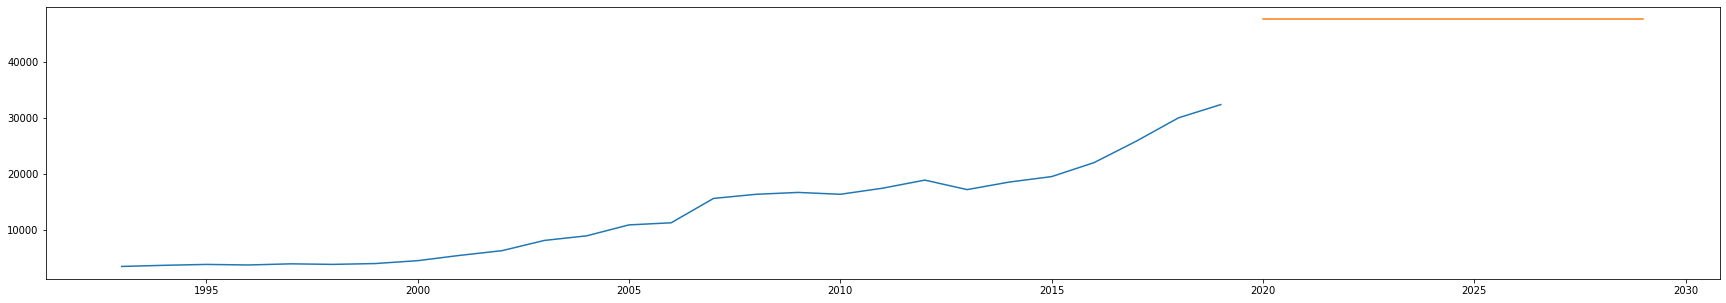

In [79]:
#Orange shows the prediction, blue shows the time series data

plt.plot(time_new,scaler.inverse_transform(df1[(l-27):]))
plt.plot(time_after,scaler.inverse_transform(lst_output))